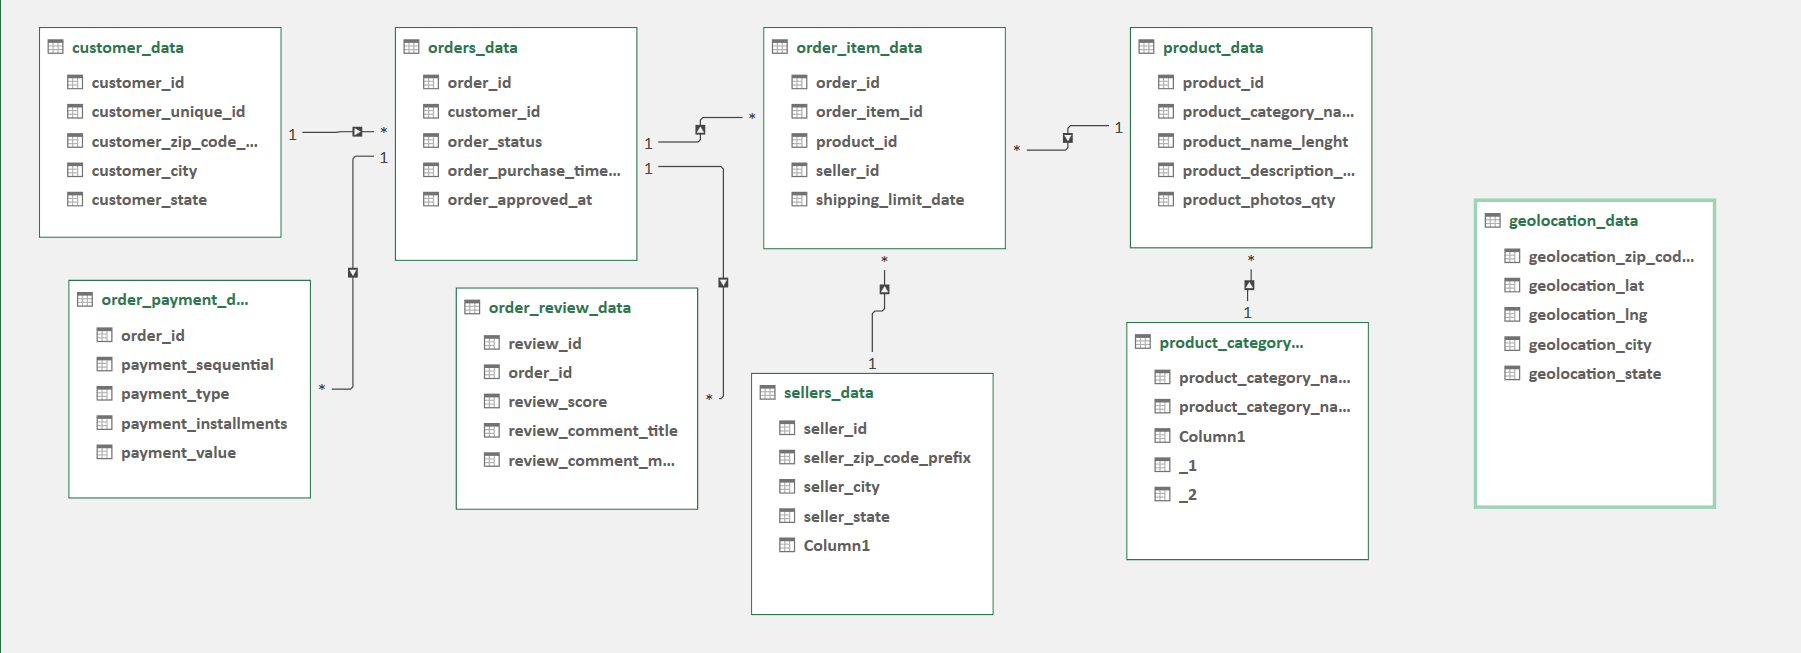

# Data cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers_data = pd.read_csv('olist_customers_dataset.csv')

In [4]:
customers_data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
for i in customers_data.columns:
    print(i ,customers_data[i].nunique())

customer_id 99441
customer_unique_id 96096
customer_zip_code_prefix 14994
customer_city 4119
customer_state 27


In [7]:
order_item = pd.read_csv('olist_order_items_dataset.csv')
order_item.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [8]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
order_data = pd.read_csv('olist_orders_dataset.csv')
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
order_data.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [11]:
order_data.drop(['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date'],axis = 1,inplace = True)

In [12]:
order_data['order_estimated_delivery_date'] = pd.to_datetime(order_data['order_estimated_delivery_date'])
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'])

In [13]:
order_data['Days_between'] = (order_data['order_estimated_delivery_date'] - order_data['order_purchase_timestamp']).dt.days 

In [14]:
order_data['Days_between'].unique()

array([ 15,  19,  26,  12,  22,  27,  21,  41,  24,  25,  40,  13,  34,
        33,   9,  17,  43,   7,  20,  46,  28,  31,  30,  35,  45,  16,
        23,  39,  14,  37,  29,  11,  10,   3,  32,  18,  47,   2,  42,
        53,   8,  49,   6,  36,  38,   4,  48,   5,  64,  62,  58,  56,
        54,  52,  50,  59,  44,  55,  87,  51,  74,  69,  61,  73,  60,
        70,  65,  71,  97,  72, 106,  57,  68,  67, 109,  86, 146,  94,
        83,  66,  63,  90, 144,  91, 101,  89,  78, 149,  84,  79,   1,
        81,  93, 142, 155,  96,  88, 116,  95,  82,  76, 140,  99,  92])

In [15]:
payment_data = pd.read_csv('olist_order_payments_dataset.csv')
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [16]:
review_data = pd.read_csv('olist_order_reviews_dataset.csv')
product_data = pd.read_csv('olist_products_dataset.csv')
seller_data = pd.read_csv('olist_sellers_dataset.csv')

# Data processing

In [18]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
customers_data.drop(['customer_unique_id','customer_zip_code_prefix'],axis = 1,inplace = True)

In [20]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [21]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 5   Days_between                   99441 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.6+ MB


In [22]:
order_item.drop('shipping_limit_date',axis = 1,inplace = True)

In [23]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
 5   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [24]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 5   Days_between                   99441 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.6+ MB


In [25]:
payment_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
review_data.drop(['review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],axis = 1,inplace = True)

In [28]:
review_data.columns

Index(['review_id', 'order_id', 'review_score'], dtype='object')

In [29]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [30]:
seller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [33]:
product_data.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [34]:
product_data.drop(['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],axis = 1,inplace = True)

In [35]:
product_data['product_category_name'] = product_data['product_category_name'].replace({np.nan : 'Not defined'})

In [36]:
product_data.isna().sum()

product_id               0
product_category_name    0
dtype: int64

# Data visualization

*customer_data*

In [38]:
customer_behaviour = order_data.merge(customers_data,on = 'customer_id')

In [39]:
customer_behaviour['customer_id'].nunique() # we can see that there is 99441 customer_id is there that means 0 return rate

99441

In [40]:
customer_behaviour['order_status'].value_counts().values

array([96478,  1107,   625,   609,   314,   301,     5,     2])

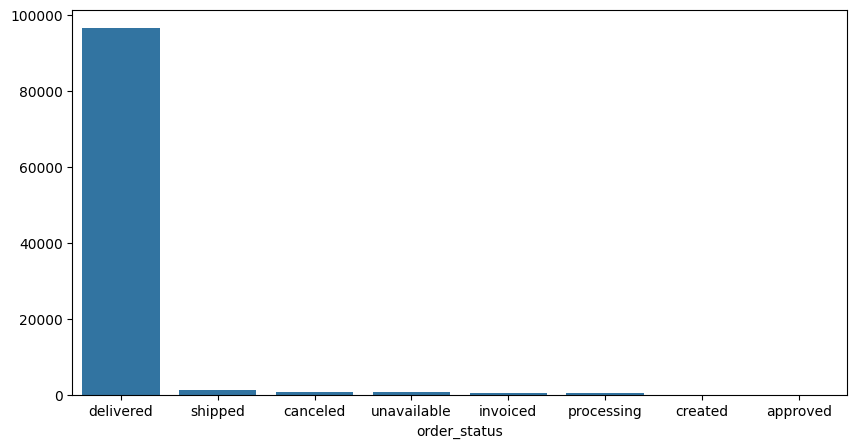

In [41]:
plt.figure(figsize=(10, 5))
cx = sns.barplot(x = customer_behaviour['order_status'].value_counts().index , y = customer_behaviour['order_status'].value_counts().values )

In [42]:
customers_data['customer_city'].value_counts()[:5]

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64

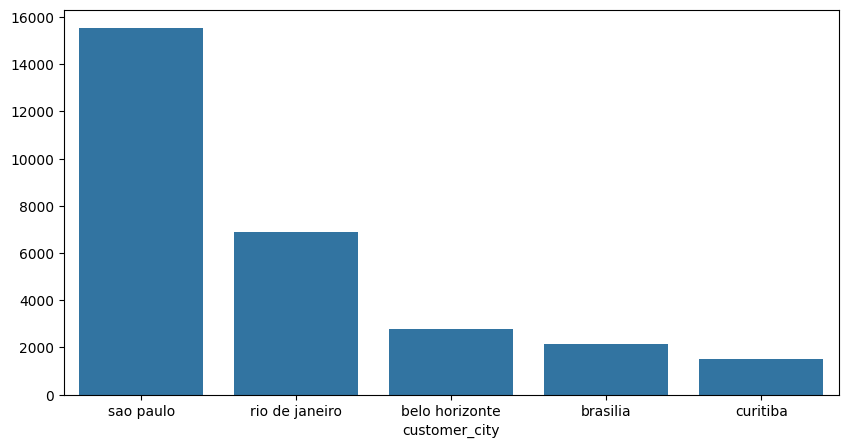

In [43]:
#Top 5 city from where customer belongs
plt.figure(figsize=(10, 5))
px = sns.barplot(x = customers_data['customer_city'].value_counts()[:5].index,y = customers_data['customer_city'].value_counts()[:5].values)

In [44]:
customers_data['customer_state'].value_counts()[:5]

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64

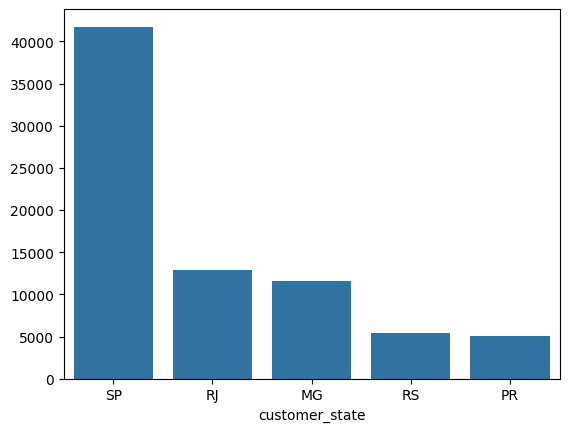

In [45]:
zx = sns.barplot(x = customers_data['customer_state'].value_counts()[:5].index,y = customers_data['customer_state'].value_counts()[:5].values)

*Order_data*

In [46]:
order_data['Days_between'].value_counts()

Days_between
21     5988
22     5599
23     5513
24     5237
25     4859
       ... 
95        1
76        1
140       1
99        1
92        1
Name: count, Length: 104, dtype: int64

In [47]:
order_data['Days_between'].value_counts()[:20]  #17-30 maximum days require to delivered the product

Days_between
21    5988
22    5599
23    5513
24    5237
25    4859
19    4781
20    4772
26    4633
27    4031
28    3776
18    3570
17    3228
30    2905
29    2881
16    2845
15    2675
12    2668
13    2591
32    2433
31    2404
Name: count, dtype: int64

In [48]:
order_data['Days_between'].value_counts()[order_data['Days_between'].value_counts().index == 155] # max 155 days data is there

Days_between
155    1
Name: count, dtype: int64

In [49]:
order_data['Month_of_purchase'] = order_data['order_purchase_timestamp'].dt.month

In [50]:
order_data['year_of_purchase'] = order_data['order_purchase_timestamp'].dt.year

In [51]:
order_data['year_of_purchase'].value_counts()

year_of_purchase
2018    54011
2017    45101
2016      329
Name: count, dtype: int64

In [52]:
order_data['Month_of_purchase'].value_counts() #maximum order are get from 8 , 5 and 7th month

Month_of_purchase
8     10843
5     10573
7     10318
3      9893
6      9412
4      9343
2      8508
1      8069
11     7544
12     5674
10     4959
9      4305
Name: count, dtype: int64

In [53]:
line_data = order_data.pivot_table(index = [order_data['year_of_purchase'],order_data['Month_of_purchase']],aggfunc = 'size')
line_data = line_data.reset_index()
line_data = line_data.set_index('year_of_purchase')
# line_data.column
line_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2016 to 2018
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Month_of_purchase  25 non-null     int32
 1   0                  25 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 400.0 bytes


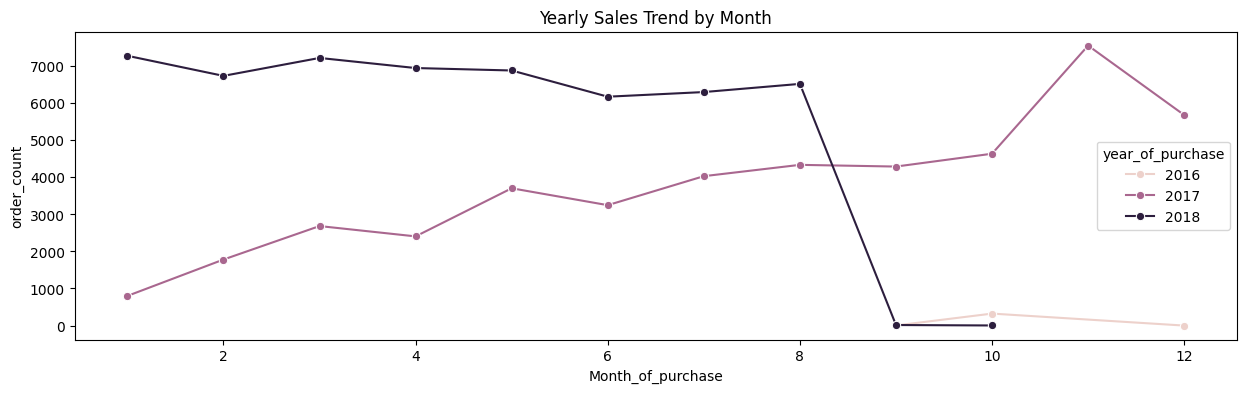

In [54]:
plt.figure(figsize = (15,4))
sns.lineplot(
    data=line_data,  # Reset index to make levels regular columns
    hue=line_data.index, 
    y=0,  # Replace with the actual column name you want to plot
    x="Month_of_purchase",marker = 'o'
)
plt.ylabel('order_count')
plt.title("Yearly Sales Trend by Month")
plt.show()


In [55]:
pivot2 = customers_data.pivot_table(index = ['customer_state','customer_city'],aggfunc = 'size')
pivot2

customer_state  customer_city          
AC              brasileia                  1
                cruzeiro do sul            3
                epitaciolandia             1
                manoel urbano              1
                porto acre                 1
                                          ..
TO              silvanopolis               1
                sitio novo do tocantins    2
                taguatinga                 3
                tocantinopolis             7
                xambioa                    3
Length: 4310, dtype: int64

In [56]:
pivot2[pivot2.values == pivot2.values.max()]

customer_state  customer_city
SP              sao paulo        15540
dtype: int64

In [57]:
pivot1 = pivot2.reset_index()

In [58]:
pivot1['rank'] = pivot1[0].rank(method = 'dense',ascending = False)
pivot1[pivot1['rank']<=3]

,customer_state,customer_city,0,rank
1062,MG,belo horizonte,2773,3.0
2788,RJ,rio de janeiro,6882,2.0
4176,SP,sao paulo,15540,1.0


*order_item*

In [59]:
order_item['Total_price'] = order_item['price'] + order_item['freight_value']
order_item

,order_id,order_item_id,product_id,seller_id,price,freight_value,Total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,218.04
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,64.71


In [64]:
order_item.loc[order_item['Total_price'].idxmax()]

order_id         0812eb902a67711a1cb742b3cdaa65ae
order_item_id                                   1
product_id       489ae2aa008f021502940f251d4cce7f
seller_id        e3b4998c7a498169dc7bce44e6bb6277
price                                      6735.0
freight_value                              194.31
Total_price                               6929.31
Name: 3556, dtype: object

In [84]:
order_item.groupby(['product_id'])['price'].sum().sort_values(ascending = False)[:5]

product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
Name: price, dtype: float64

In [95]:
def cat(val):
    # Get product details
    filtered_products = product_data[product_data['product_id'].isin(val)]
    
    # Get sales values
    sales_values = order_item.groupby(['product_id'])['price'].sum().reset_index()
    
    # Merge product details with sales values
    merged_data = filtered_products.merge(sales_values, on='product_id', how='left')
    
    return merged_data.loc[:,['product_category_name','price']]

# Get top 5 product IDs based on total sales
top_5_products = order_item.groupby(['product_id'])['price'].sum().sort_values(ascending=False)[:5].index

# Get product details along with sales values
result = cat(top_5_products)
print(result)


    product_category_name     price
0  informatica_acessorios  47214.51
1         cama_mesa_banho  43025.56
2            beleza_saude  63885.00
3            beleza_saude  54730.20
4                     pcs  48899.34


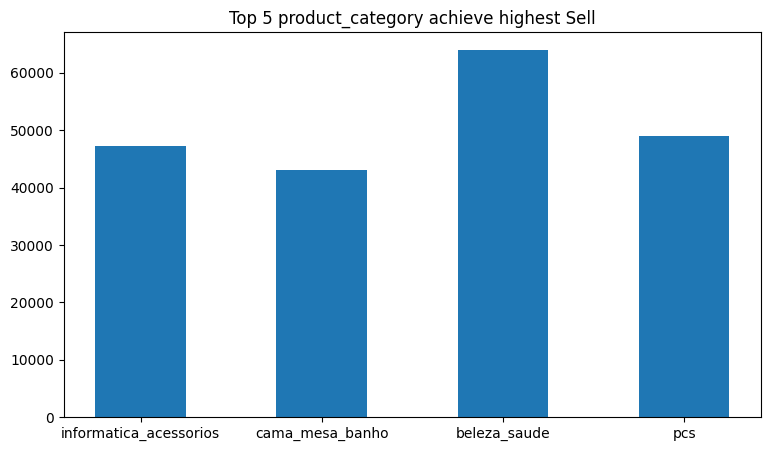

In [105]:
#Top 5 product_category achieve max sell
plt.figure(figsize = (9,5))
plt.bar(data = result,x = 'product_category_name',height = 'price',width=0.5)
plt.title('Top 5 product_category achieve highest Sell')
plt.show()

*order_review*

In [108]:
review_data

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4


In [149]:
merge1 = pd.merge(left = order_data,right = review_data,on = 'order_id')
merge1['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

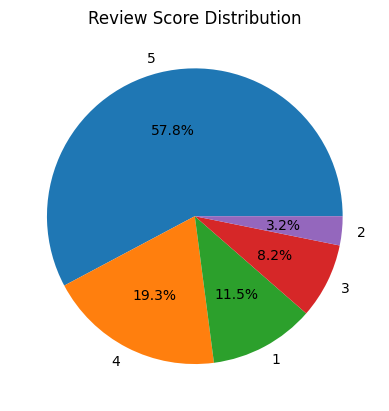

In [124]:
# Create pie chart
plt.pie(
    x=merge1['review_score'].value_counts(), 
    labels=merge1['review_score'].value_counts().index, 
    autopct='%1.1f%%'
)
plt.title("Review Score Distribution")
plt.show()

In [139]:
# First, merge order_item with product_data on 'product_id'
merged2 = order_item.merge(product_data, on='product_id', how='inner')

# Next, merge the result with order_data on 'order_id'
final_merged = merged2.merge(merge1, on='order_id', how='inner')

final_merged

,order_id,order_item_id,product_id,seller_id,price,freight_value,Total_price,product_category_name,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,Days_between,Month_of_purchase,year_of_purchase,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,72.19,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29,15,9,2017,97ca439bc427b48bc1cd7177abe71365,5
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,259.83,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-15,18,4,2017,7b07bacd811c4117b742569b04ce3580,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,216.87,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-02-05,21,1,2018,0c5b33dea94867d1ac402749e5438e8b,5
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,25.78,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-20,11,8,2018,f4028d019cb58564807486a6aaf33817,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,218.04,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-17,40,2,2017,940144190dcba6351888cafa43f3a3a5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,343.40,utilidades_domesticas,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-18,24,4,2018,9185f849f32d82e216a4e025e0c50f5c,5
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,386.53,informatica_acessorios,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-08-01,17,7,2018,be803f6a93d64719fd685c1cc610918a,5
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,116.85,esporte_lazer,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-11-10,17,10,2017,dbdd81cd59a1a9f94a10a990b4d48dce,5
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,64.71,informatica_acessorios,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-25,10,8,2017,fba117c9ac40d41ca7be54741f471303,5


In [156]:
print(final_merged.groupby(['product_category_name'])['review_score'].mean().sort_values(ascending = False)[:1])
print(final_merged.groupby(['product_category_name'])['review_score'].mean().sort_values()[:1])

# category cds_dvds_musicais got max review_score
# category seguros_e_servicos got min review_score

product_category_name
cds_dvds_musicais    4.642857
Name: review_score, dtype: float64
product_category_name
seguros_e_servicos    2.5
Name: review_score, dtype: float64


*seller_data*

In [161]:
seller_data

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [182]:
seller = seller_data.groupby('seller_state')['seller_city'].apply(lambda x: ', '.join(x.unique())).reset_index().set_index('seller_state')
seller['city_count'] = seller_data['seller_state'].value_counts()
seller

,seller_city,city_count
seller_state,,
AC,rio branco,1
AM,manaus,1
BA,"lauro de freitas, porto seguro, salvador, barr...",19
CE,"fortaleza, mucambo, pacatuba, juzeiro do norte...",13
DF,"brasilia, brasilia df, gama",30
ES,"viana, cachoeiro de itapemirim, cariacica / es...",23
GO,"anapolis, santa terezinha de goias, uruacu, go...",40
MA,sao luis,1
MG,"belo horizonte, camanducaia, congonhal, aragua...",244


In [186]:
merge3 = order_item.merge(seller_data,on='seller_id')
merge3['seller_id'].value_counts()
# Top 5 seller that deliever most product
merge3['seller_id'].value_counts()[:5]

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: count, dtype: int64

In [195]:
customers_data['customer_state'].value_counts()[:5]

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64

In [199]:
merge3['seller_state'].value_counts()[:5]
# We can see that a sufficient number of sellers are available in the customer states where we received the most orders.

seller_state
SP    80342
MG     8827
PR     8671
RJ     4818
SC     4075
Name: count, dtype: int64

In [203]:
merge3.groupby(['seller_id'])['freight_value'].sum().sort_values(ascending = False)[:5]

seller_id
7c67e1448b00f6e969d365cea6b010ab    51612.55
1f50f920176fa81dab994f9023523100    35165.77
4a3ca9315b744ce9f8e9374361493884    35067.04
1025f0e2d44d7041d6cf58b6550e0bfa    33892.14
a1043bafd471dff536d0c462352beb48    31844.09
Name: freight_value, dtype: float64

In [215]:
merge3.groupby('seller_city')['freight_value'].mean().sort_values(ascending = False)[:5]

#lages -sc city have the most delievery charges

seller_city
lages - sc               168.533333
sao francisco do sul     150.220000
california               143.775000
sao  jose dos pinhais    142.400000
nova trento              131.850000
Name: freight_value, dtype: float64

*payment_data*

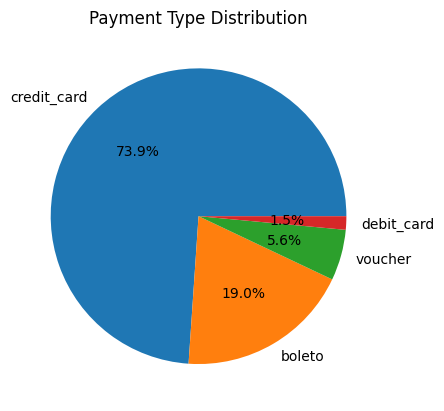

In [236]:
plt.pie(
    x=payment_data['payment_type'].value_counts()[:4], 
    labels=payment_data['payment_type'].value_counts().index[:4], 
    autopct='%1.1f%%'
)

plt.title('Payment Type Distribution')

plt.show()

# Overall Summery

*Customer_data*

In [247]:
# no of customer Data available
print("No of customer data available:",customers_data['customer_id'].nunique())
print("customer city data available:",customers_data['customer_city'].nunique())
print("customer state data available:",customers_data['customer_state'].nunique())

No of customer data available: 99441
customer city data available: 4119
customer state data available: 27


*payment_data*

In [251]:
print("Payment type available:",payment_data['payment_type'].unique())

Payment type available: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


*order_data*

In [257]:
order_data.nunique()[:3]

order_id        99441
customer_id     99441
order_status        8
dtype: int64

In [260]:
order_data.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [301]:
year_count = order_data.year_of_purchase.value_counts().sort_index().reset_index()
year_count
# count of order increases year wise

,year_of_purchase,count
0,2016,329
1,2017,45101
2,2018,54011


In [265]:
order_data.Month_of_purchase.value_counts()

Month_of_purchase
8     10843
5     10573
7     10318
3      9893
6      9412
4      9343
2      8508
1      8069
11     7544
12     5674
10     4959
9      4305
Name: count, dtype: int64